In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve

In [23]:
df = pd.read_csv('Titanic-Dataset.csv', sep =',')

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [33]:
# Primero imputamos los valores faltantes de la variable Age con la mediana.
df['Age'] = df['Age'].fillna(df['Age'].median())

In [37]:
# Dado que la mayoria de los datos de la variable cabin son faltantes, no aportan gran significado al anlisis y se elimina
df = df.drop(columns=['Cabin'])

In [41]:
# Para la columna Embarked como solo hacen falta 2 valores, aplicados el valor mas frecuente la moda.
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [47]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

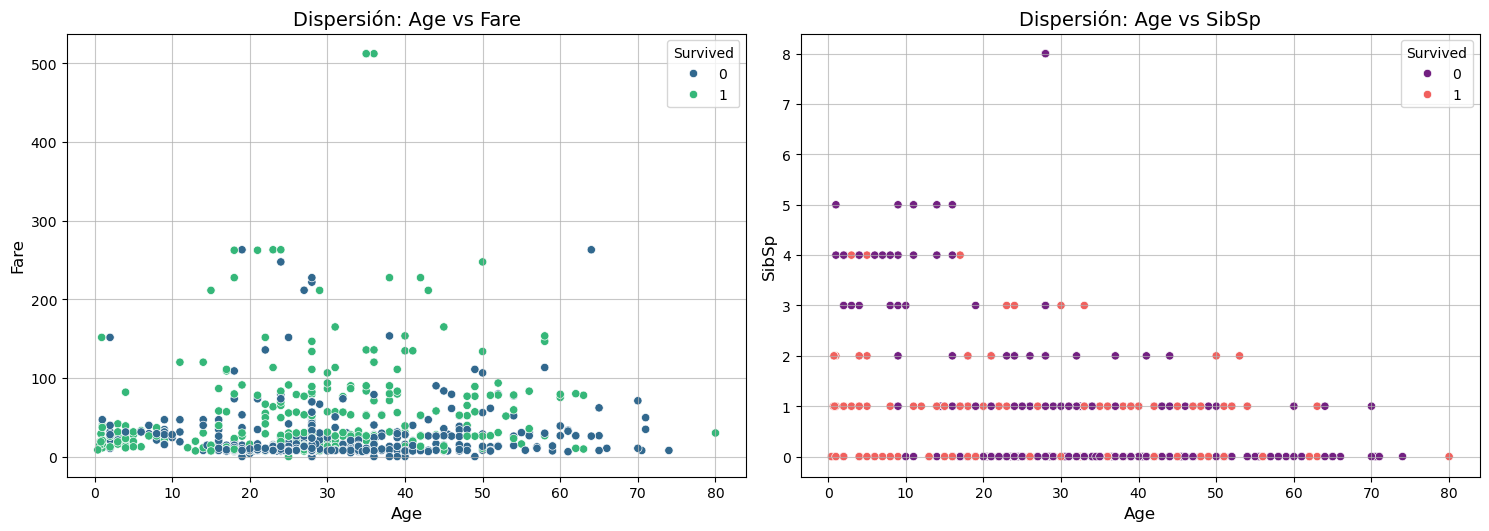

In [69]:
# Utlizamos graficos de dispercion para identificar estos valores atipicos y de paso los comparamos en función de la varibale Survived
plt.figure(figsize=(15, 10))

# Graficos de dispersión Fare vs Age
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='viridis')
plt.title('Dispersión: Age vs Fare', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.grid(alpha=0.7)

# Grafico de dispersión Age vs SibSp
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Age', y='SibSp', hue='Survived', palette='magma')
plt.title('Dispersión: Age vs SibSp', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('SibSp', fontsize=12)
plt.grid(alpha=0.7)

# Visualizar graficos
plt.tight_layout()
plt.show()

In [73]:
# Las caracteristicas mas importantes para entrenar el modelo son: Edad, numero de hermanos, tarifa y sobrevivio
# Características y la variable objetivo
features = ['Age', 'SibSp', 'Fare']
target = 'Survived'

# Variables predictoras (X) y objetivo (y)
X = df[features]
y = df[target]

# Dividir el dataset en conjuntos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (712, 3)
Tamaño del conjunto de prueba: (179, 3)


In [79]:
# Aplicamos el modelo de regresion logistica 
model = LogisticRegression(C=1.0, max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [87]:
# Evaluamos el desempeño del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")
# Precision
precision = precision_score(y_test, y_pred)
print(f"Precisión (Precision): {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión del modelo: 0.6816
Precisión (Precision): 0.8400
Recall: 0.2838
F1-score: 0.4242
Matriz de Confusión:
[[101   4]
 [ 53  21]]


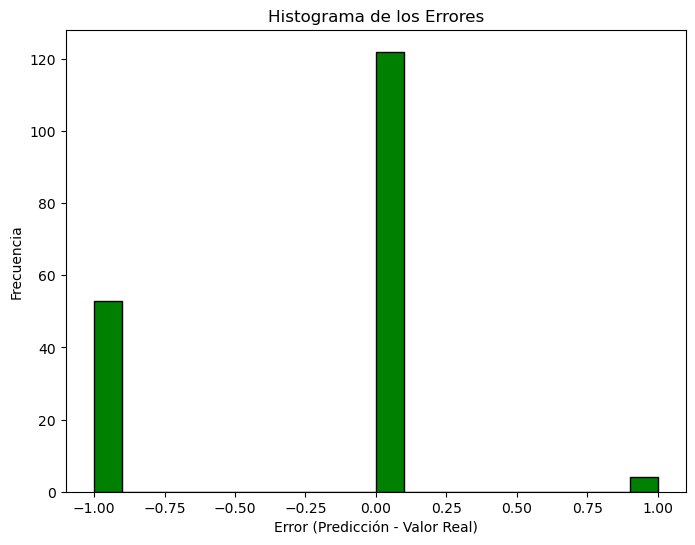

In [89]:
# Graficas de los resultados del modelo
# Calcula los errores
errors = y_pred - y_test

# istograma de los errores
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, color='green', edgecolor='black')
plt.title("Histograma de los Errores")
plt.xlabel("Error (Predicción - Valor Real)")
plt.ylabel("Frecuencia")
plt.show()

**Nota**: La gran mayoría de las predicciones del modelo se encuentran muy cerca del valor real, lo que se traduce en un buen ajuste del modelo a los datos.

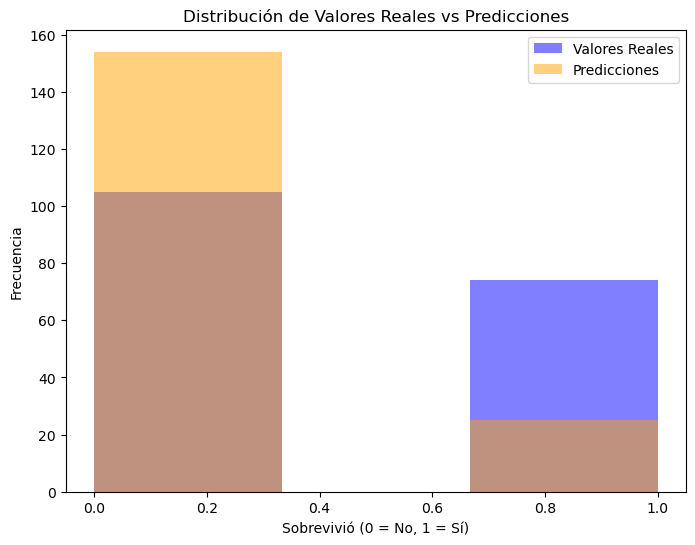

In [101]:
# Distribución de las predicciones y valores reales
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=3, alpha=0.5, label="Valores Reales", color='blue')
plt.hist(y_pred, bins=3, alpha=0.5, label="Predicciones", color='orange')
plt.title("Distribución de Valores Reales vs Predicciones")
plt.xlabel("Sobrevivió (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.legend(loc='upper right')
plt.show()

**Nota:** La mayoría de los pasajeros no sobrevivieron al naufragio, como lo indica la barra más alta, sin embargo la distribución de las predicciones no coincide exactamente con los valores reales.

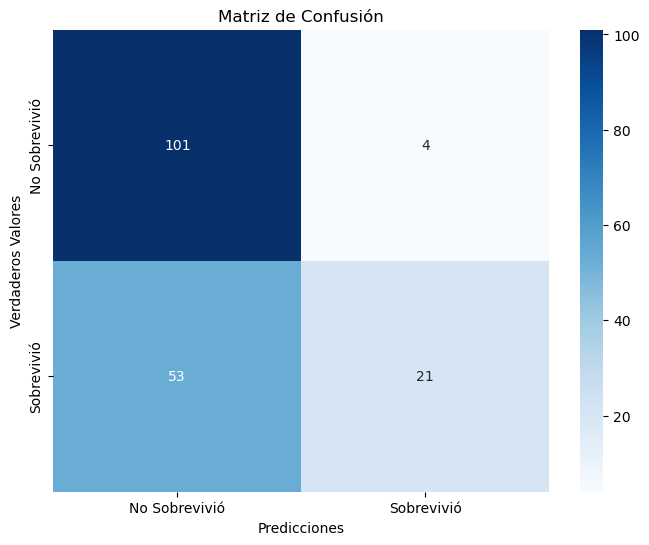

In [99]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Dibuja la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Sobrevivió", "Sobrevivió"], yticklabels=["No Sobrevivió", "Sobrevivió"])
plt.title("Matriz de Confusión")
plt.ylabel("Verdaderos Valores")
plt.xlabel("Predicciones")
plt.show()

**Nota:** La matriz de confusión muestra que el modelo cumple una buena predicción para los fallecidos, pero presenta algunas dificultades para identificar a los supervivientes, ya  que predice 101 verdaderos negativos que un pasajero no sobreviviría y 53 falsos negativos de que el pasajero sibrevivira.